In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 回帰
### 回帰とは
**回帰**とは 教師あり学習に分類される機械学習手法で、与えられたデータ(**説明変数**)から実数値を予測する手法である。またこの章で取り扱うのはその中でも説明変数が1次の**単回帰**と呼ばれるもので、説明変数が高次になると**重回帰**と呼ばれ、これは次章に取り扱う。単回帰では**回帰直線**を求め予測を行う。

###　残差
単回帰を実装するにあたって「残差」を導入する。
今以下のような５つの事例を持つデータ$D$がある
$$ 
D = \{(x_{i}, y_{i})\}_{i=1}^{N}= \{(4, 15), (6, 8), (5, 17), (8, 15), (3, 1)\} 
$$
ここで１次関数$\epsilon_{i}$モデル$\hat{y} = ax + b$の$a$、$b$を$a = 2, b = 1$に設定して回帰直線を考える。
また$\hat{y}$は目的変数をモデルに適用し計算された予測値を表す。

データ$D$の各点$(x_{i}, y_{i})$とモデルで計算される点$(x, \hat{y})$を以下にプロットする。



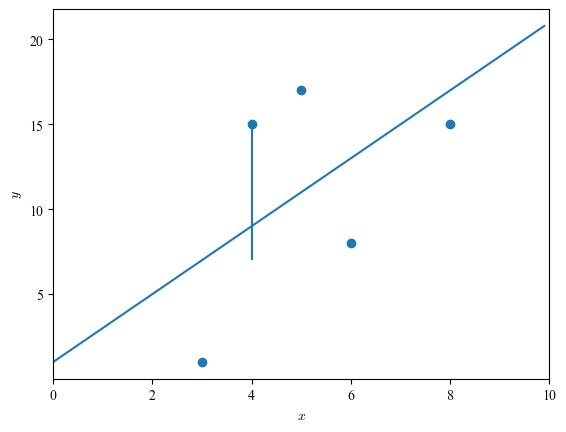

In [30]:
data = np.array([[4, 15], [6, 8], [5, 17], [8, 15], [3, 1]])

x = np.arange(0, 10, 0.1)
y = 2 * x  + 1
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.plot(x, y)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(0, 10)
plt.yticks([0, 5, 10, 15, 20])

plt.vlines(x=data[0, 0], ymin=min(2 * data[0, 0] - 1, data[0, 1]), ymax=max(2 * data[0, 0] - 1, data[0, 1]))
plt.axvline(x=4, ymin=7, ymax=15)
plt.show()


7 15


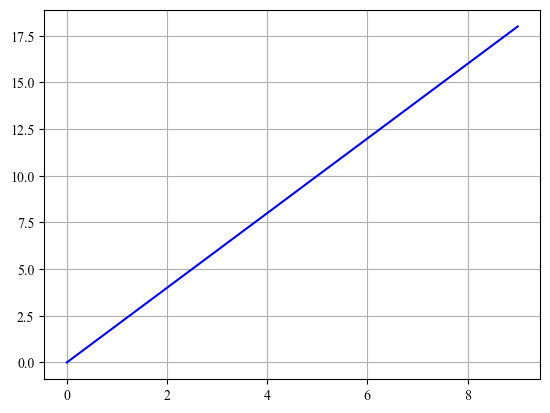

In [20]:
xdata = list(range(10))
ydata = [_ * 2 for _ in xdata]

plt.plot(xdata, ydata, "b")
ymin = min(2 * data[0, 0] - 1, data[0, 1])
ymax = max(2 * data[0, 0] - 1, data[0, 1])

print(ymin, ymax)
# plt.axvline(x=data[0, 0], ymin=ymin, ymax=ymax)


plt.grid()
plt.show()


上図は１例であるが、$a$、$b$の値を変えることで様々な回帰直線ができる。しかし、設定した$a$、$b$がどのくらいデータにあっているかを定量的にみる必要がある。そこで使用するのが残差である。残差とは求めた予測値と実測値とのずれを表す数値で上図では各点と直線との距離に値する。よって残差の計算式は以下のようになる。(ここでは残差を$\epsilon$で表し、データ$D$の$i$番目の要素に対応する残差を$	\epsilon_{i}$としている。)
$$ 
\epsilon_{i} = y_{i} - \hat{y}_{i} 
$$
したがって以下のような計算になる。
$$
\left\{ 
\begin{array}{l}
\displaystyle  \epsilon_{1} = y_{2} - \hat{y}_{1} = 15 - 9 = 6\\
\epsilon_{2} = y_{2} - \hat{y}_{2} = 8 - 13 = -5\\
\epsilon_{3} = y_{3} - \hat{y}_{3} = 17 - 11 = 6\\ 
\epsilon_{4} = y_{4} - \hat{y}_{4} = 15 - 17 = -2\\ 
\epsilon_{5} = y_{5} - \hat{y}_{5} = 1 - 7 = -6\\ 
\end{array} 
\right .
$$
これで各事例の残差は計算できたのでデータ$D$の残差について考える。単純に各事例の残差を合計し、そこから平均をとっても、残差の正負で($\epsilon_{1}$と$\epsilon_{3}$のように)打ち消しあう可能性がある。また各事例の残差の絶対値をとってから平均を計算すると数学的な処理が困難になる。したがって2乗和の平均をとる**平均二乗誤差**を用いる。
$$
 \hat{L} = \displaystyle \frac{1}{N}\sum_{n = 1}^{\N}\epsilon_{i} ^ 2 = \displaystyle \frac{1}{N}\sum_{n = 1}^{\N}(y_{i} - \hat{y}_{i}) ^ 2
$$
データ$D$で計算すると
$$
\hat{L} = \displaystyle \frac{1}{5}\sum_{n = 1}^{5}\epsilon_{i} ^ 2 = \frac{1}{5}\{6 ^ 2 + (-5) ^ 2 + 6 ^ 2 + (-2) ^ 2 + (-6) ^ 2\} = 27.4
$$ 

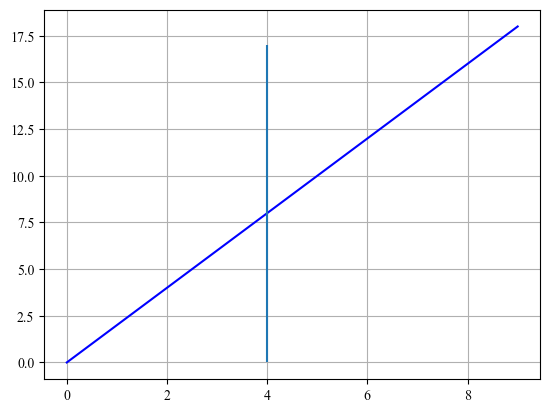

In [42]:

xdata = list(range(10))
ydata = [_ * 2 for _ in xdata]

plt.plot(xdata, ydata, "b")

plt.vlines(x=4, ymin=0, ymax=17, label='y')

plt.grid()
plt.show()

4
[4]
6
[6]
5
[5]
8
[8]
3
[3]


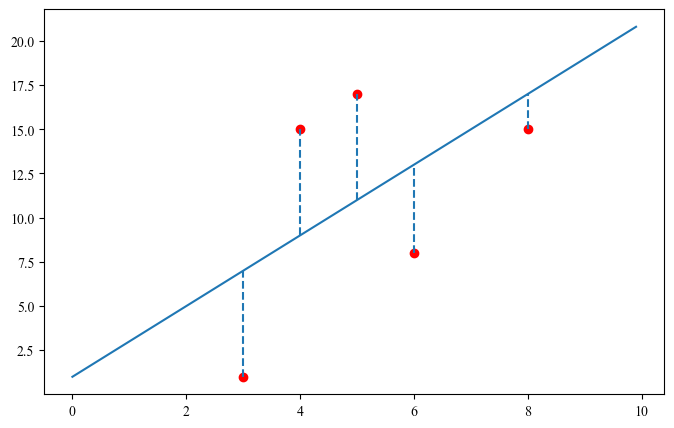

In [38]:
data = np.array([[4, 15], [6, 8], [5, 17], [8, 15], [3, 1]])

x = np.arange(0, 10, 0.1)
y = 2 * x + 1

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.scatter(data[:, 0], data[:, 1], color='red')
for i, row in enumerate(data[:, 0]):
    print(row)
    print([row])
    ax.vlines([row], ymin=min(2 * row + 1, data[i, 1]), ymax=max(2 * row + 1, data[i, 1]), linestyles='dashed', label=f'`{i+1}')

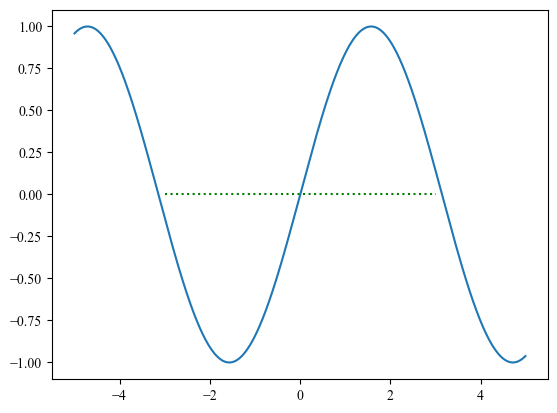

In [40]:
x = np.arange(-5, 5, 0.01)
y = np.sin(x)
plt.plot(x, y)

plt.hlines(0, -3, 3, color='g', linestyles='dotted', label='y=0')
plt.show()

In [58]:
data = fetch_california_housing()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=['target'])
print( df_X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [78]:
df_X['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

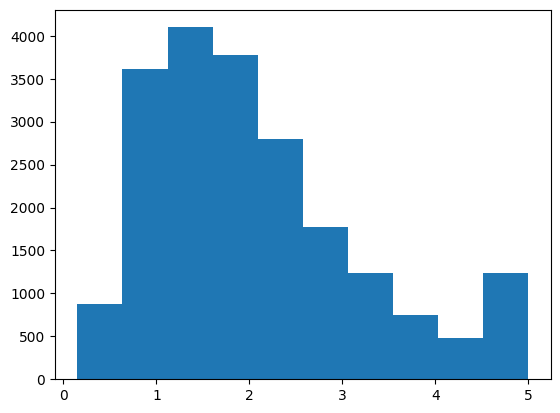

In [81]:
plt.hist(df_y)

In [65]:
x = df_X['MedInc'].to_numpy().reshape(-1, 1)
y = df_y.to_numpy()
n = df_X.shape[0]
print(n)

20640


In [75]:
a = (np.dot(x.T, y).mean() - x.mean() * y.mean()) / (np.dot(x.T, x).mean() - x.mean() ** 2)
b = y.mean() - a * x.mean()
print(a, b)

0.5118051609261253 0.08752877355425515


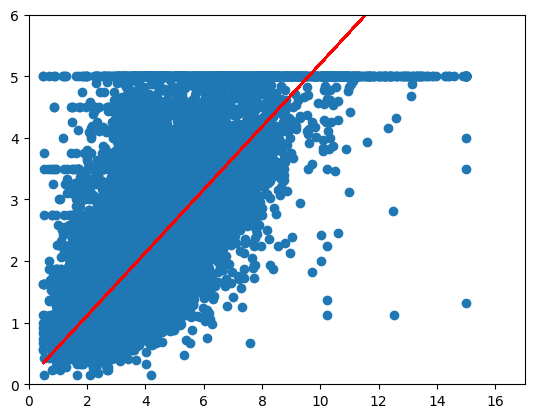

In [77]:
x = df_X['MedInc']
y = df_y

fig, ax = plt.subplots()
ax.plot(x, a * x + b, color='red')
ax.scatter(x, y)
ax.set_xlim(0, 17)
ax.set_ylim(0, 6)
plt.show()


In [30]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
data_array = iris_dataset["data"]
line_num = iris_dataset["target"]
line = iris_dataset["target_names"]
feature = iris_dataset["feature_names"]

print(data_array.shape)
print(line_num.shape)
print(line.shape)
print(len(feature))

(150, 4)
(150,)
(3,)
4
